## Homework #3.1 - Data Visualization

### Overview:
Data visualization is the graphical representation of information and
data. Using visual elements like charts, graphs, and maps, data visualization
tools provide an accessible way to see and understand trends,
outliers, and patterns in data. This is what you will do today.

### Tasks:
* For this chapter, you will have to do the following:
  * Import the Data Set.
  * Prepare the dataset.
  * Repeat the plots that were presented in the book.
  * Search for new plots that you could build, which might come from different libraries. Here is just your imagination and curiosity.

In [94]:
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Since I decided to use the "Titanic - Machine Learning from Disaster" Dataset in the previous Homework, I will extend the analysis from it and will use visualization to support
findings

I read the CSV file using read_csv() method that will transform the CSV data in Dataframe for an easier manipulation with it.

In [95]:
dataset = pd.read_csv("dataset/titanic_train.csv")

Next, I will display the dataset using 2 methods:
* head(n) - display first n rows from the dataset
* tail(n) - display last n rows from the dataset.

In [96]:
dataset.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [97]:
dataset.tail(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


The features in the dataset are the following:
* PassengerId - useless, an ID assign to each row in the dataset,
* Survived - contains the Target Variables, that shows if the Passenger survived,
* Pclass - contains information about Ticket class,
* Name - pretty straight-forward, the Name and Surname of the Passenger,
* Sex - gender of the Passenger,
* Age - in years,
* SibSp - number of siblings / spouses of the Passenger on the Titanic,
* Parch - number of parent / children of the Passenger on the Titanic,
* Ticket - Ticket Number,
* Fare - how much money did the Passenger spent on the Ticket,
* Cabin - cabin number that Passenger stayed,
* Embarked - in which Port did Passenger embarked.

In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As it follows, info() returned me some information about the dataset:
* Class - Dataframe, obviously a Table Data object,
* Index Range - 891 entries (Passengers and their information), indexed 0 through 890,
* Number of Rows - 891
* Number of Columns - 12 (1 column is Target Variable - "Survived", 11 columns are Features)
* Non-Null Values - per each column, it displayed how many Non-Null values are present, for example: for PassengerId - 891 Non-Null values, therefore, no null values in that column,
or Age with 714 Non-Null values, therefore there are some Null values in Age column, and so on.
* Data type - per each column, it also showed the datatype that is stored in that column, for example: Survived contains only int64 object, or Name - contains Object, that, as we
saw, are strings, and so on. Per general, there are 2 float64 columns, 5 int64 columns and 5 object columns.
* Memory Usage - 83.7+ KB needed space to store that Data Frame object.

Next, I will check the missing values in the dataset using isnull() method from pandas, that will show a boolean for each cell (True if Null, False otherwise), and combine it with
sum() that will return a Series, that will have Indexes as the name of the columns in the original DataFrame object, and will have per each column the number of Null values.

In [99]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


There are Null values only in the column of Age, Cabin and Embarked.

I will drop the non-relevant columns, such as: PassengerId, Ticket, and, at the same time, will proceed with the unique column for family size instead of 2 separate columns for
siblings number and parents.

In [100]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset.drop(['PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.0,7.2500,NaN,S,2
1,1,1,female,38.0,71.2833,C85,C,2
2,1,3,female,26.0,7.9250,NaN,S,1
3,1,1,female,35.0,53.1000,C123,S,2
4,0,3,male,35.0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN,S,1
887,1,1,female,19.0,30.0000,B42,S,1
888,0,3,female,NaN,23.4500,NaN,S,4
889,1,1,male,26.0,30.0000,C148,C,1


Next, I will transform the Cabin column into Deck column by taking only the first character of the Cabin string, which represented the actual Deck where this Cabin is located. At
the same time, I will handle the Null values in this column, by replacing NaN cabins/decks with a new category/deck "X" that will be unknown deck.

In [101]:
dataset["Cabin"] = dataset["Cabin"].str[0].fillna("X")
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.0,7.2500,X,S,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,X,S,1
3,1,1,female,35.0,53.1000,C,S,2
4,0,3,male,35.0,8.0500,X,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,X,S,1
887,1,1,female,19.0,30.0000,B,S,1
888,0,3,female,NaN,23.4500,X,S,4
889,1,1,male,26.0,30.0000,C,C,1


Next, I will handle Null values in the Age and Embarked columns. Since Age column contains considerable amount of null values, I decided to impute Null values instead of just
dropping them as I did in the previous Homework. For this, I can use Mean, Median or Mode Imputation, but the most appropriate one can be chosen based on the BoxPlot, that will
describe the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable, and will show the quartiles of
the dataset and its outliers.

<Axes: xlabel='Age', ylabel='Survived'>

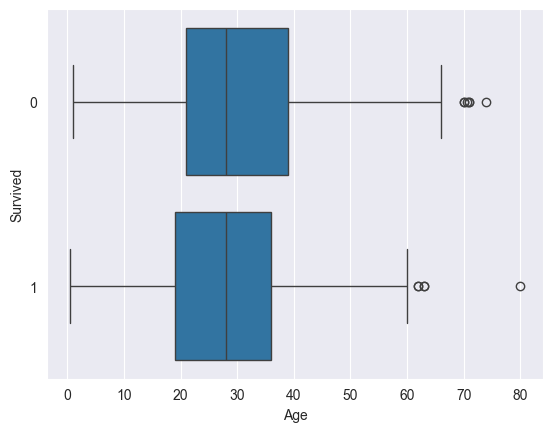

In [102]:
plt.figure()
sns.boxplot(y='Survived', x='Age', data=dataset, orient='h')

Since there are several outliers in the categories of Survived, the Mean Imputation is not the best one, since the outliers affect the Mean value and may induce skewness, and
because the distribution is slightly skewed, especially in the Category with Not Survived Age data. Therefore, Median Imputation is better in this case, since the median is not
affected by the outliers or skewed distributions, it shows the middle of the ordered data, in my case - of Age data.

In [103]:
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.0,7.2500,X,S,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,X,S,1
3,1,1,female,35.0,53.1000,C,S,2
4,0,3,male,35.0,8.0500,X,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,X,S,1
887,1,1,female,19.0,30.0000,B,S,1
888,0,3,female,NaN,23.4500,X,S,4
889,1,1,male,26.0,30.0000,C,C,1


In [104]:
dataset["Age"] = dataset["Age"].fillna(dataset['Age'].median())
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.0,7.2500,X,S,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,X,S,1
3,1,1,female,35.0,53.1000,C,S,2
4,0,3,male,35.0,8.0500,X,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,X,S,1
887,1,1,female,19.0,30.0000,B,S,1
888,0,3,female,28.0,23.4500,X,S,4
889,1,1,male,26.0,30.0000,C,C,1


<Axes: xlabel='Age', ylabel='Survived'>

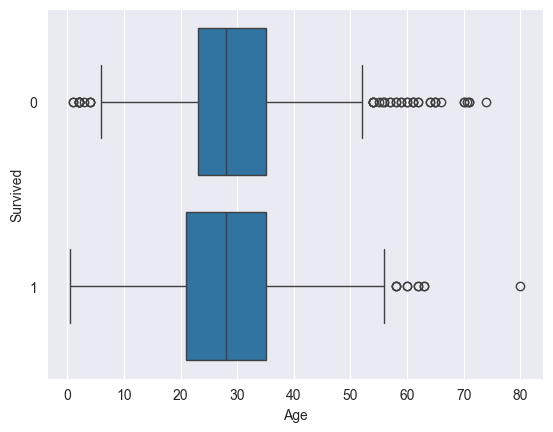

In [105]:
plt.figure()
sns.boxplot(y='Survived', x='Age', data=dataset, orient='h')

Next, I will handle the missing data in the Embarked column. Since there are only 2 missing values of this kind, it is acceptable to just drop them. I can use instead of this the
Mode imputation, that will replace the missing values with the most frequent value in the column, without dropping the entire row.

In [106]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.0,7.2500,X,S,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,X,S,1
3,1,1,female,35.0,53.1000,C,S,2
4,0,3,male,35.0,8.0500,X,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,X,S,1
887,1,1,female,19.0,30.0000,B,S,1
888,0,3,female,28.0,23.4500,X,S,4
889,1,1,male,26.0,30.0000,C,C,1


In [107]:
print(dataset.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
FamilySize    0
dtype: int64


Now, I can begin visualization of the data using extensive functionalities of matplotlib and seaborn. I will follow the Handbook methods of visualization

First, I will implement basic line plot between 2 continuous numerical data: Age and Fare

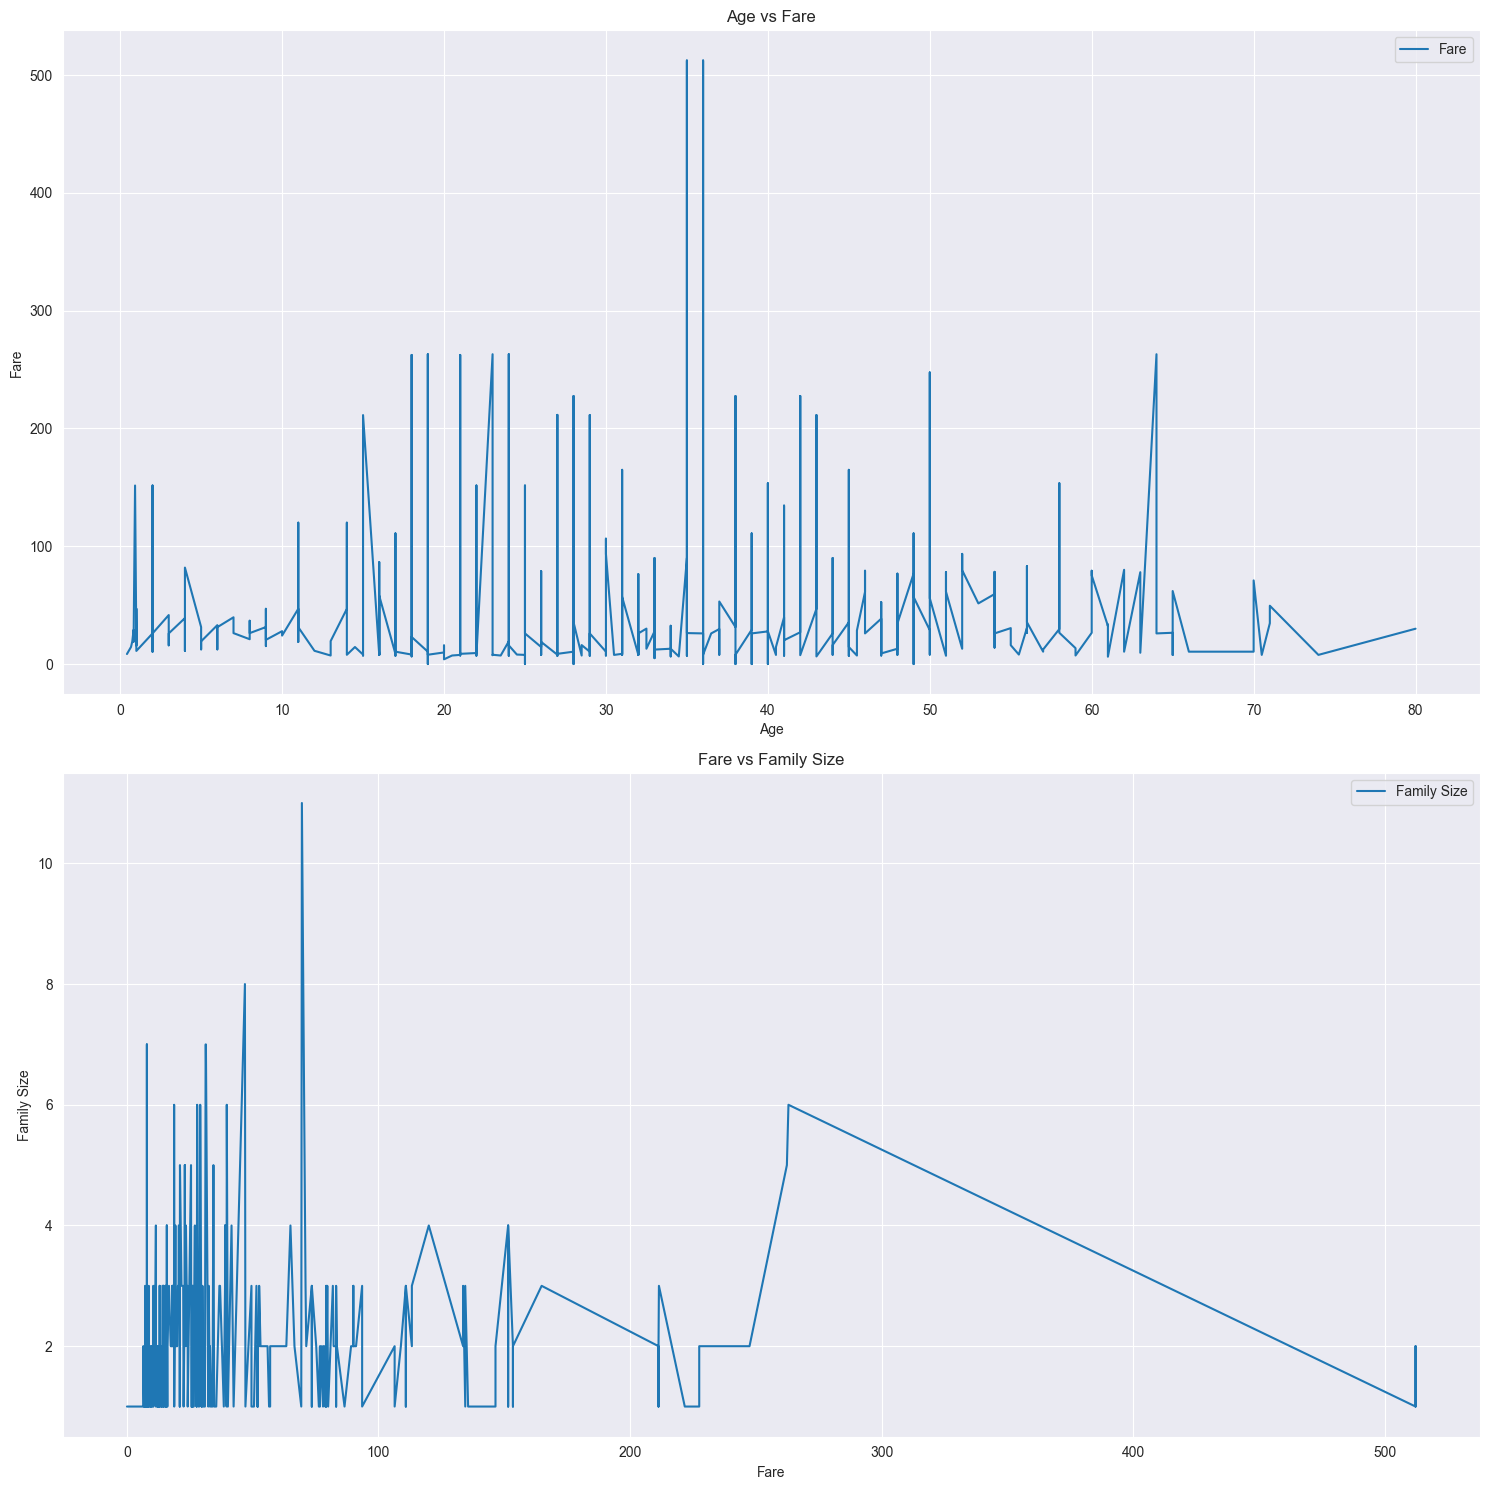

In [108]:
dataset_sorted_age = dataset.sort_values('Age')
fig, ax = plt.subplots(2, figsize=(15, 15))

ax[0].plot(dataset_sorted_age['Age'], dataset_sorted_age['Fare'], label="Fare")
ax[0].set_title('Age vs Fare')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')
ax[0].legend()

dataset_sorted_age = dataset.sort_values('Fare')
ax[1].plot(dataset_sorted_age['Fare'], dataset_sorted_age['FamilySize'], label="Family Size")
ax[1].set_title('Fare vs Family Size')
ax[1].set_xlabel('Fare')
ax[1].set_ylabel('Family Size')
ax[1].legend()

plt.tight_layout()
plt.show()

As it may be seen, the middle-aged people spent more fare on average than extremities (younger and older people). At the same time, most families of size between 1 and 3 spent
less fare, which is logical, however there might be discrepancy since the data about the fare is individual for each person, and it may not reflect exactly the total fare for the
entire family. May be noticed, as well, that there are some points/data that are extremely far from the main cluster of points on the plot, that might be the outliers in the data.

Next, I will plot some scatter plots, that will help me create plots with points that may have different properties, and those properties will be shown on the plot.

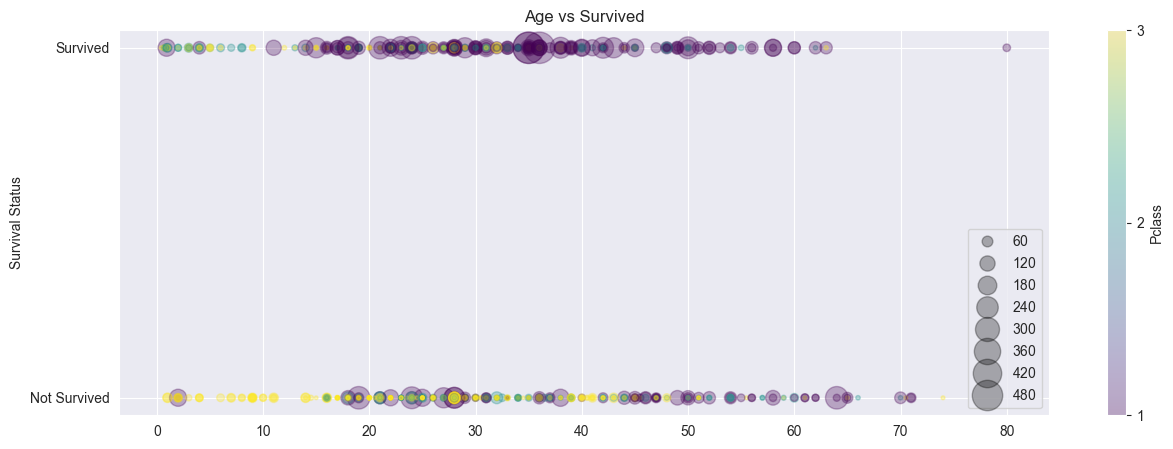

In [109]:
plt.figure(figsize=(15, 5))
scatter_plot = plt.scatter(x=dataset['Age'], y=dataset['Survived'], c=dataset['Pclass'], s=dataset['Fare'], alpha=.3, cmap='viridis', vmin=1, vmax=3)
cbar = plt.colorbar(scatter_plot, ticks=[1, 2, 3])
cbar.set_label('Pclass')
plt.title("Age vs Survived")
plt.legend(*scatter_plot.legend_elements("sizes", num=10))
plt.yticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel('Survival Status')
plt.show()

In the above Scatter Plot, I plot:
* On the X-Axis = Age, as Numerical Continuous Data
* On the Y-Axis = Survived, as Categorical Data
* Color = Class of the Ticket (3, 2, 1)
* Size = Fare, that Passenger paid for the trip.

As a result, I obtained that most of the young people were in the class 3, the lowest category, while old and middle-aged people were higher in the class (2 and 1). At the same
time, judging by the size of the points, middle-aged people paid more for their Tickets, while young people paid little money. At the same time, most people that did not survive
were in the class 3 Ticket, while people in the classes 1 and 2 were the most survivors of the Titanic. At the same time, most people survived paid more for their Ticket (Fare),
and more younger people survived while most of the people that did not survive were middle-aged to old people, and, similarly, people with higher class survived more than people
in the lower class.

Next, I will plot an error bar plot that will show the Standard Error of the Mean of the Survival Rate in dependence of the Deck where Passenger was located.

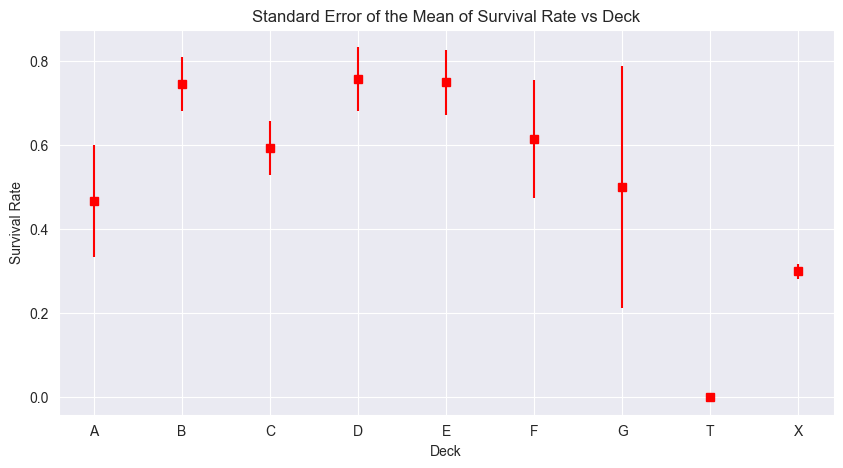

In [110]:
class_groups = dataset.Cabin
survival_rate = dataset.groupby(class_groups, observed=True)['Survived'].mean()
standard_error_mean = dataset.groupby(class_groups, observed=True)['Survived'].sem()
plt.figure(figsize=(10, 5))
plt.errorbar(x=survival_rate.index.astype(str), y=survival_rate, yerr=standard_error_mean, fmt='sr')
plt.xlabel("Deck")
plt.ylabel("Survival Rate")
plt.title("Standard Error of the Mean of Survival Rate vs Deck")
plt.show()

As it may be seen, the highest Survival Rate was on B, D and E Decks, while T and X (Passengers with Unknown Decks) were more likely to not Survive the Titanic Incident. At the
same time, the whiskers actually shows the Standard Error of the Mean, that is telling us about how confident can we be in the average (mean) that is calculated, which tells us
how much the sample mean would vary if you were to repeat a study using new samples from within a single population. Therefore, data about Deck G shows that if new Passenger that
were on deck G would appear in the dataset, the mean of the survival rate would likely change in this range, from 0.2 to 0.8, that the sample mean that was calculated is most
likely not very close to the actually true value of the mean in this population, while the range of the X (Anonymous Deck) would most likely not change much their Survival Rate,
which shows the consistency in those Data points and that calculated sample mean is most likely very close to the actual mean of the entire population.

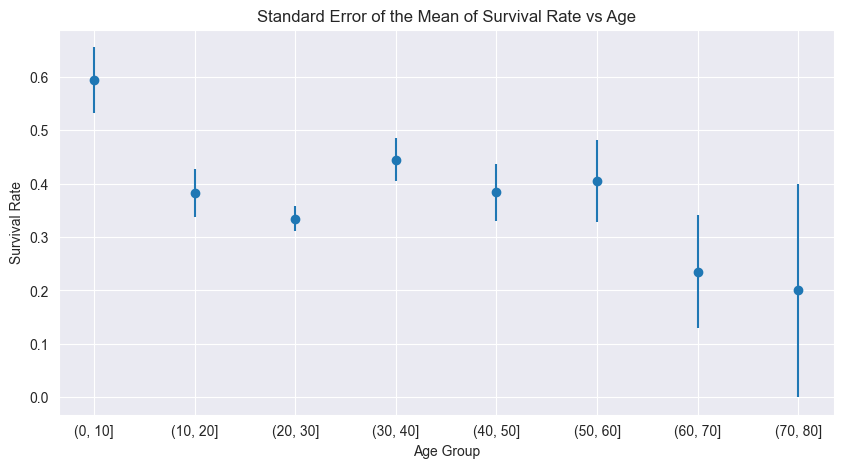

In [111]:
age_groups = pd.cut(dataset['Age'], bins=np.arange(round(dataset['Age'].min()), round(dataset["Age"].max()) + 1, 10))
survival_rate = dataset.groupby(age_groups, observed=True)['Survived'].mean()
standard_error_mean = dataset.groupby(age_groups, observed=True)['Survived'].sem()
plt.figure(figsize=(10, 5))
plt.errorbar(x=survival_rate.index.astype(str), y=survival_rate, yerr=standard_error_mean, fmt='o')
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Standard Error of the Mean of Survival Rate vs Age")
plt.show()

Same here, the Standard Error of the Mean of the Survival Rate and Age Groups. Certainly, the survival rate of younger people is higher, while older people are more likely to not
Survive. The whiskers show that people in range 20 and 30 years are most likely to not survive the Titanic crash, very close to the actual true value of that mean, and that people
in the range of 70 and 80 years are more likely to not survive, but may not reflect the true value of the mean in this age group in this context.

In the following cell, I will plot several Bar Plots that will display several data correspondence, like: Sex vs Survived, Family Size vs Survived, and others.

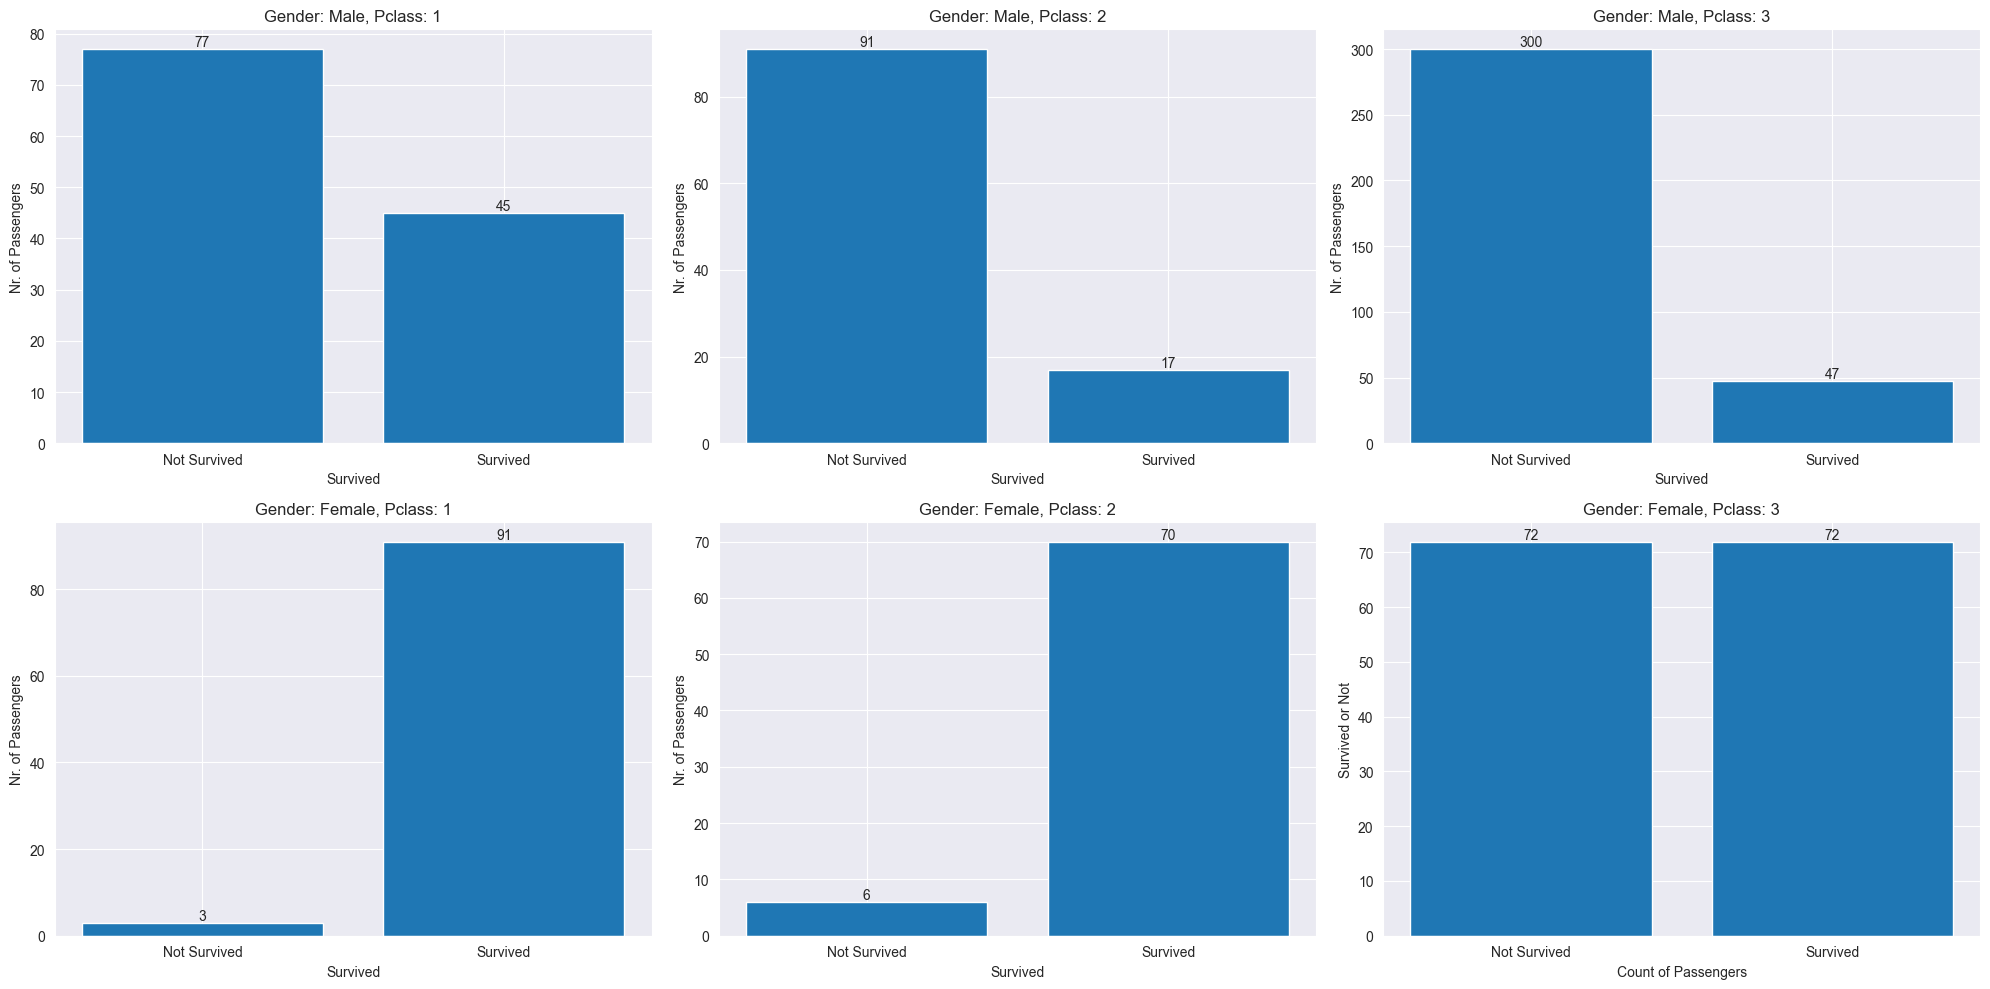

In [112]:
fig, axes = plt.subplots(nrows=len(dataset['Sex'].unique()), ncols=len(dataset['Pclass'].unique()), figsize=(20, 10))

for row_index, gender in enumerate(dataset['Sex'].unique()):
    for col_index, pclass in enumerate(sorted(dataset['Pclass'].unique())):
        count_gender_pclass = dataset[(dataset.Sex == gender) & (dataset.Pclass == pclass)]['Survived'].value_counts()
        ax = axes[row_index][col_index]
        bars = ax.bar(x=count_gender_pclass.index, height=count_gender_pclass.values)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10)

        ax.set_title(f'Gender: {gender.capitalize()}, Pclass: {pclass}')
        ax.set_xlabel('Survived')
        ax.set_ylabel('Nr. of Passengers')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Not Survived', 'Survived'])
plt.xlabel("Count of Passengers")
plt.ylabel("Survived or Not")
plt.tight_layout()
plt.show()

As it may be seen, here I plot the Count Plots in the form of Bar Plots, based on several criteria/column. First, I have on the y-axis of each subplot, the actual number of
Passengers in the corresponding category, and on the x-axis - Target Variable - Survived or Not Survived. In each subplot, the data is separated by Sex - Male or Female, and their
Ticket class - 1, 2 or 3. As it may be seen, mos of the Males did not survive, with mos of dead males in the class 3 (lowest Ticket class), while in the class 1 and 2, similar
number of dead males, while the most survivors were in the class 1 and 3. Most of the females Survived, especially in class 1 and 2, however in class 3, there were equal number of
Survived and Not Survived Females. Most probably, Males were the one that helped females and children to save themselves, and they risked their lives to save them, therefore
the difference in the Survival Rate between Females and Males, and judging by the class of their Ticket, people with lower class tickets were more probably not prioritized
and their location were on more lower decks, where the survival rate, as we saw, were very low.

Next I will plot the Contour Plot, that will display 3D Data in 2D plot. In the context of the dataset, I would compare the Fare, Survived Status and Age of the passengers.

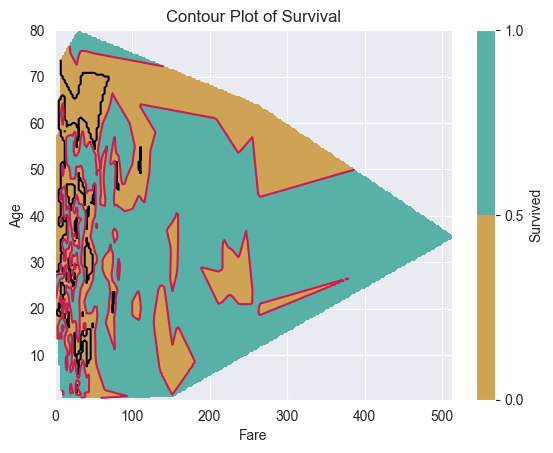

In [113]:
from scipy.interpolate import griddata

x_points = dataset['Fare']
y_points = dataset['Age']
z_points = dataset['Survived']
x_space = np.linspace(x_points.min(), x_points.max(), 200)
y_space = np.linspace(y_points.min(), y_points.max(), 200)
x_meshgrid, y_meshgrid = np.meshgrid(x_space, y_space)
z_meshgrid = griddata((x_points, y_points), z_points, (x_meshgrid, y_meshgrid), method='linear')
plt.figure()
plt.contour(x_meshgrid, y_meshgrid, z_meshgrid, levels=1)
contour = plt.contourf(x_meshgrid, y_meshgrid, z_meshgrid, levels=1, cmap='BrBG')
plt.colorbar(contour, label='Survived')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Contour Plot of Survival')
plt.show()

In this contour plot, I plot Age vs Fare vs Survival Rate, interpolated in order to be able to construct the contour plot and fill the regions inside using contourf, that will
display the Survival Rate by coloring and x and y being Fare and Age. In this case, passengers with higher Fare and that were younger had more chances to survive than older and
poor people.

Next, I will plot a Histogram that will display distribution of numerical Data. In my case, I will plot the histogram of Fare based on Gender, that will display the distribution of
the Fare among the both Genders.

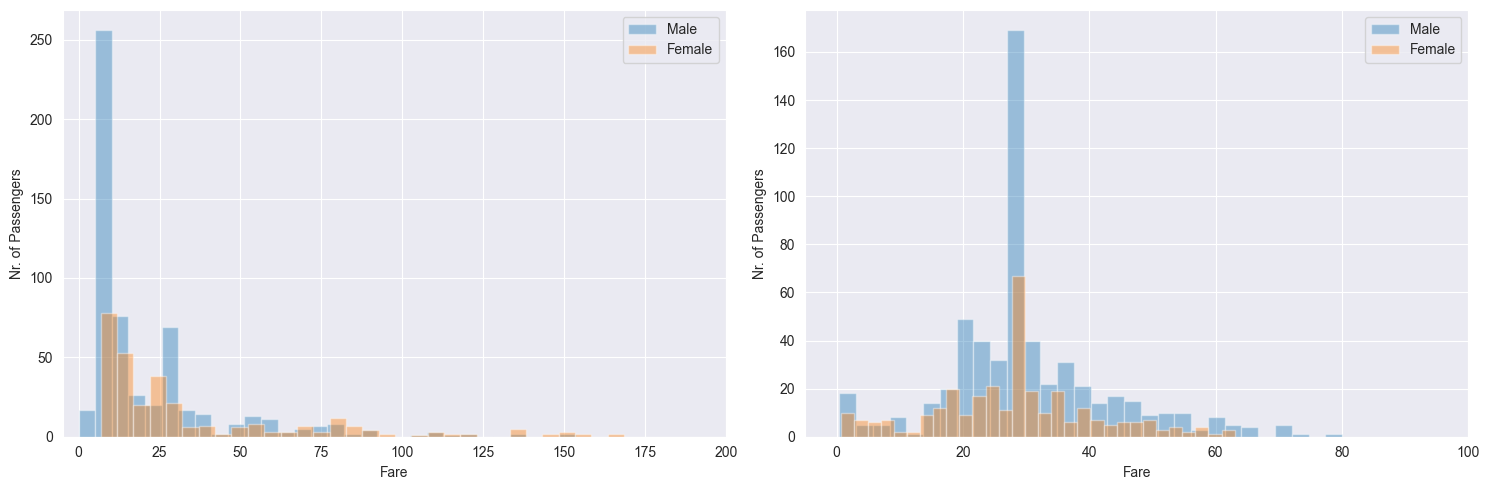

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax[0].hist(x=dataset[dataset.Sex == "male"]['Fare'], alpha=.4, bins=100, label='Male')
ax[0].hist(x=dataset[dataset.Sex == "female"]['Fare'], alpha=.4, bins=100, label='Female')
ax[0].set_xlim(-5, 200)
ax[0].set_xlabel("Fare")
ax[0].set_ylabel("Nr. of Passengers")
ax[0].legend()

ax[1].hist(x=dataset[dataset.Sex == "male"]['Age'], alpha=.4, bins=30, label='Male')
ax[1].hist(x=dataset[dataset.Sex == "female"]['Age'], alpha=.4, bins=30, label='Female')
ax[1].set_xlim(-5, 100)
ax[1].set_xlabel("Fare")
ax[1].set_ylabel("Nr. of Passengers")
ax[1].legend()

plt.tight_layout()
plt.show()

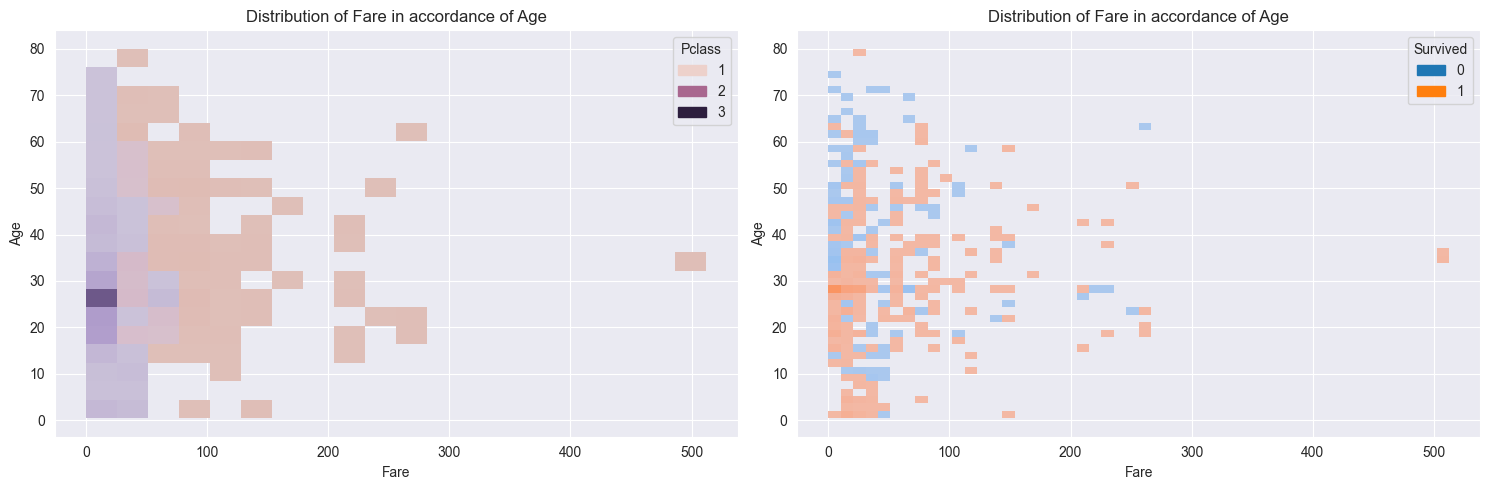

In [115]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x="Fare", y="Age", data=dataset, hue="Pclass", alpha=1, bins=20)
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Distribution of Fare in accordance of Age")
plt.subplot(1, 2, 2)

sns.histplot(x="Fare", y="Age", data=dataset, hue="Survived", alpha=1, bins=50)
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Distribution of Fare in accordance of Age")

plt.tight_layout()
plt.show()

As it may be seen, the distribution of Fare in accordance of Age with different dimensions - Ticket Class and Survived Status, shows that most of the Classes of type 3 were around
25-30 years and fare of 0-20, while the class 1 is from 50 fare and above with no clear difference in age. At the same time, most survivors paid on average 0-50 Fare and were in
the age range of 0-40 years.

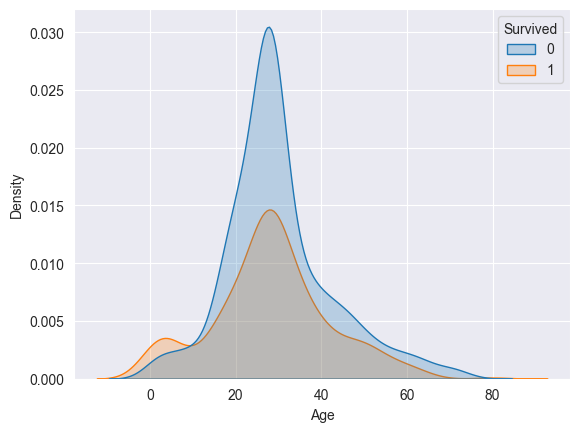

In [116]:
plt.figure()
sns.kdeplot(x='Age', data=dataset, hue='Survived', fill=True)
plt.show()

In the Kernel Density Estimation (KDE) plot we visualize the distribution of the examples in the dataset similar to histogram, but represents its probability density curve
continuously. In this case, we may identify the Normal Distribution curve in the above plot, with little skewed aspect.

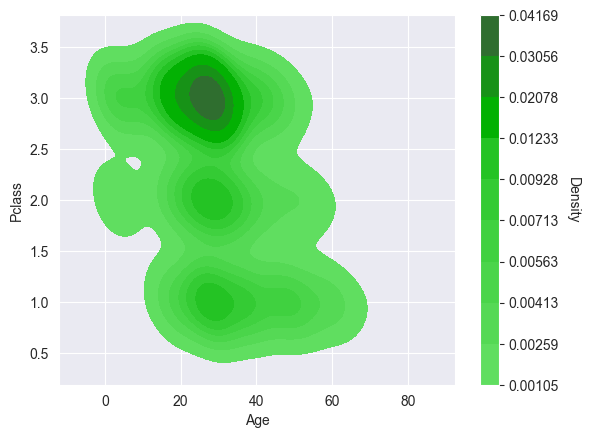

In [117]:
plt.figure()
sns.kdeplot(x='Age', y='Pclass', data=dataset, color='g', fill=True, alpha=1, cbar=True)
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Density', rotation=270, labelpad=15)
plt.show()

In the above KDE, I display the Age vs Ticket Class plot that displays the histogram of the Distribution of the dataset based on those 2 features, and it displays that most of the
passengers are of middle age (around 30 years) and are in the class 3, which is displayed by high density, and it gradually goes down with higher age or lower age and higher
Ticket Class.

<Figure size 640x480 with 0 Axes>

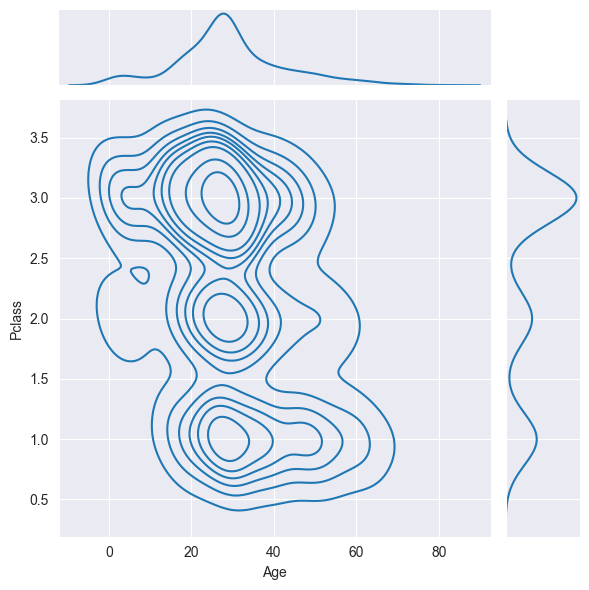

In [118]:
plt.figure()
sns.jointplot(data=dataset, x='Age', y='Pclass', kind='kde')
plt.show()

In the above plot, which is a JointPlot, it mixes both joint distribution and the marginal distributions in a single plot of multidimensional data. This illustrates the same data
as above.

<Figure size 640x480 with 0 Axes>

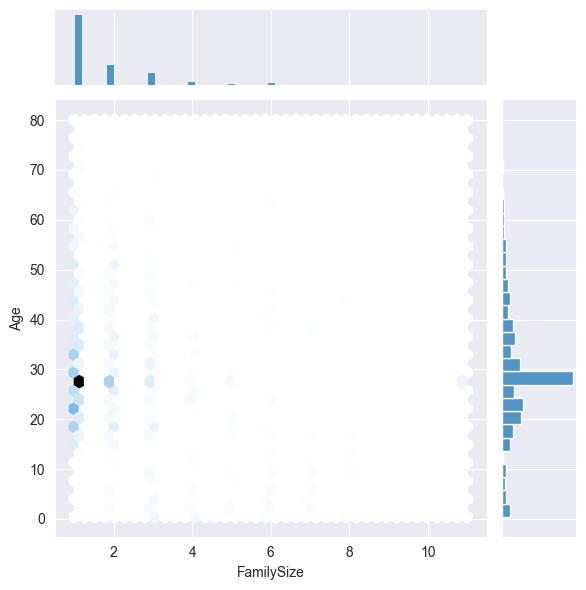

In [119]:
plt.figure()
sns.jointplot(data=dataset, x='FamilySize', y='Age', kind='hex')
plt.show()

In the above Jointplot, it shows that most of the people were of age around 30 years and travelled alone or with another family member, in total being 2.

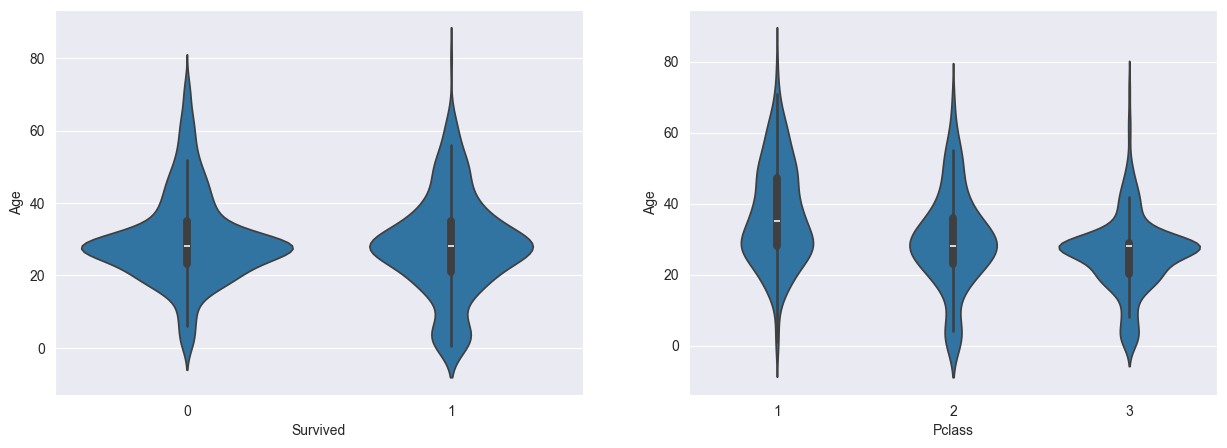

In [120]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=dataset, x='Survived', y='Age')
plt.subplot(1, 2, 2)
sns.violinplot(data=dataset, x='Pclass', y='Age')
plt.show()

In the above Violin Plots, are combined both KDE and Box plots of Age and Survived Status and Age and Ticket Class. It also displays quantitative data across different levels of
categorical variables. At the same time, it displays the density of the numerical continuous data.

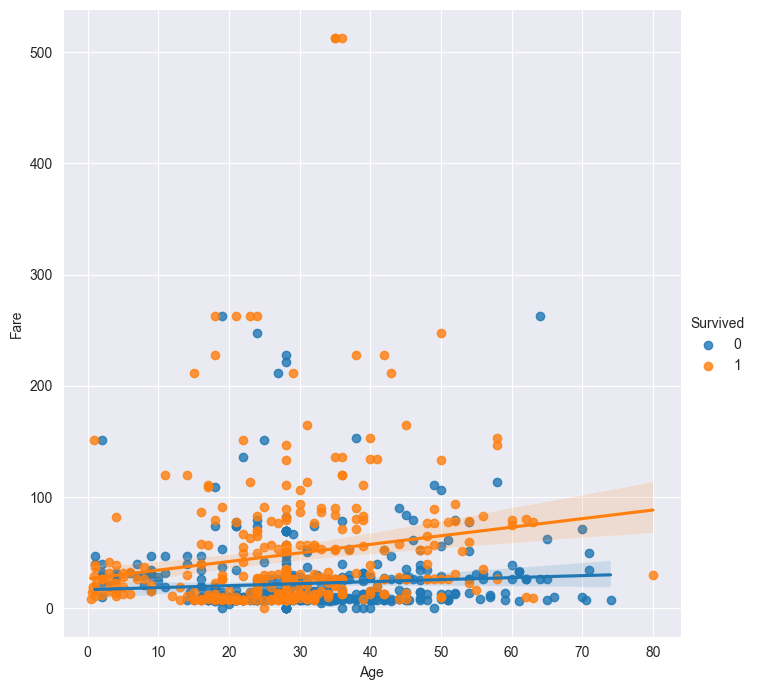

In [121]:
sns.lmplot(data=dataset, x='Age', y='Fare', hue='Survived', height=7, aspect=1)

The above plot just plots a scatter plot of given features and maps the regression model that fits each target variable possible value.

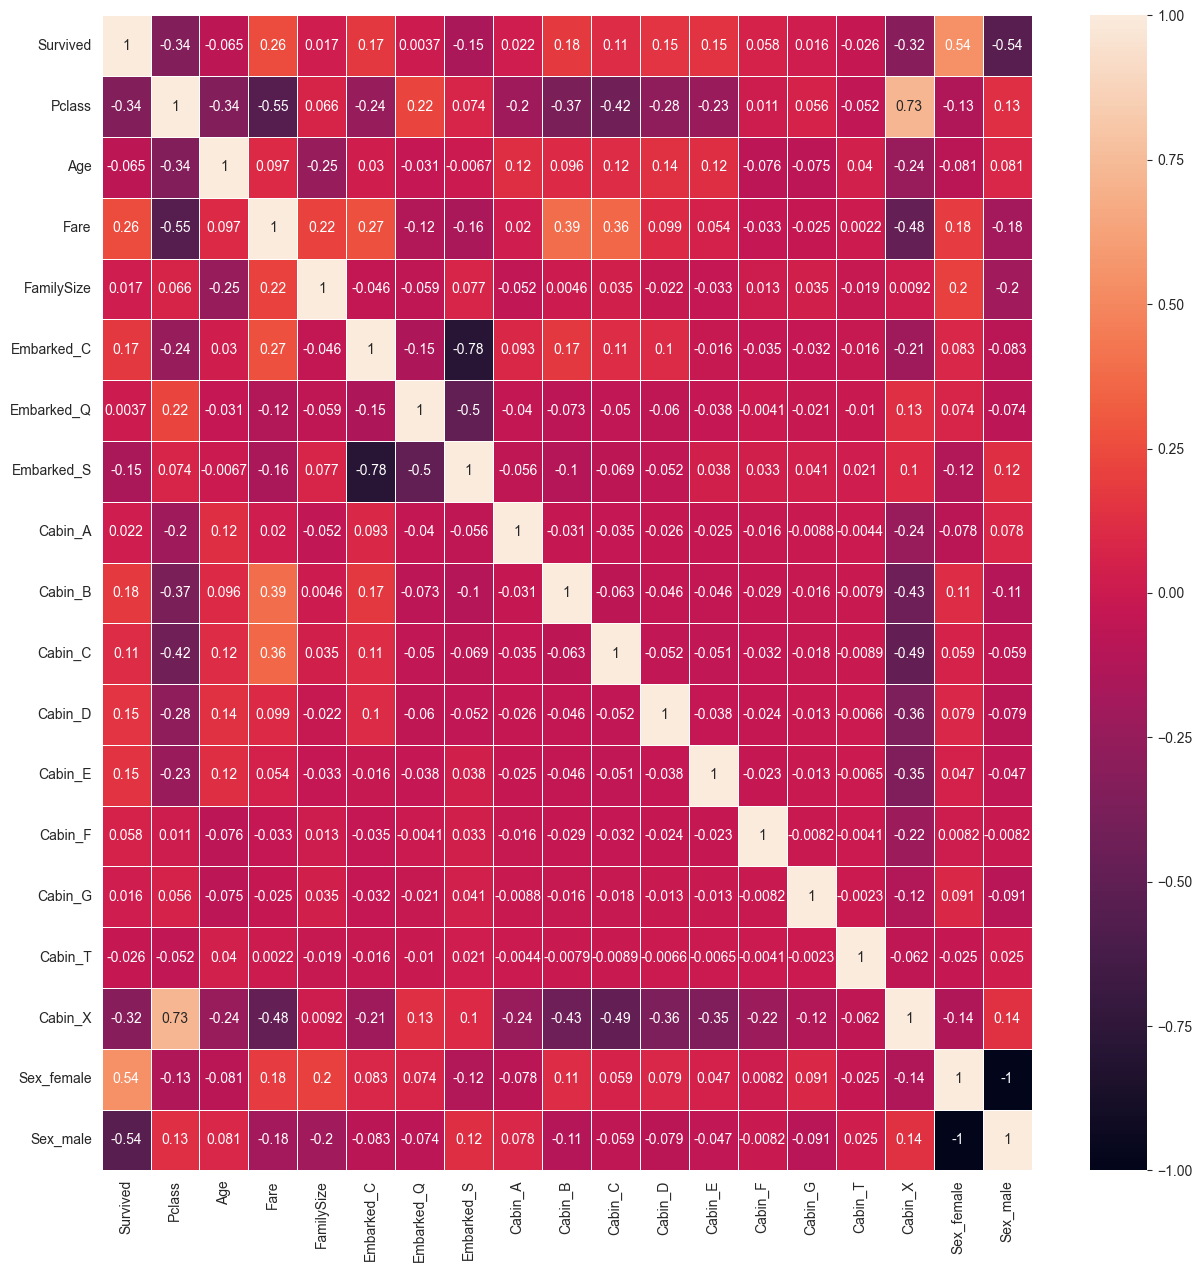

In [122]:
copy_dataset = pd.get_dummies(dataset, columns=["Embarked", "Cabin", "Sex"], dtype='int')
plt.figure(figsize=(15, 15))
sns.heatmap(copy_dataset.corr(), annot=True, linewidths=0.5, cbar=True)
plt.show()

The above plot displays the Correlation Matrix, that shows the correlation between features between each other. As described and seen previously:
* Females are more likely to survive, it has the biggest influence on the Survived Status,
* Fare - people that paid more for their Fare will also survive more often,
* Pclass - Ticket class is in inverse correlation with Survived, which means that people in class 1 will survive more often than people in lower class - 3